In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import ast
from collections import Counter
import re
import seaborn as sns
%matplotlib inline

In [3]:
genres = ['미스터리', '공포(호러)', '액션', '범죄', '판타지', '드라마', 'SF', '다큐멘터리', '전쟁','코미디', '뮤지컬', '애니메이션', '스릴러', '어드벤처', '사극', '멜로/로맨스', '기타']

In [4]:
raw_data = pd.read_csv('/home/lim/dev_ws/eda/ros_eda_project/data/movie_genre_data.csv')
raw_data.head()

,Unnamed: 0,Name,Year,Genre,Viewers
0,0,7번방의 선물,2013,"['코미디', '드라마']","12,811,206"
1,1,설국열차,2013,"['SF', '액션']","9,349,993"
2,2,관상,2013,"['사극', '드라마']","9,134,238"
3,3,아이언맨 3,2013,"['액션', '어드벤처', 'SF']","9,001,331"
4,4,베를린,2013,['액션'],"7,166,290"


In [5]:
raw_data = raw_data.drop("Unnamed: 0", axis=1)
raw_data.head()

,Name,Year,Genre,Viewers
0,7번방의 선물,2013,"['코미디', '드라마']","12,811,206"
1,설국열차,2013,"['SF', '액션']","9,349,993"
2,관상,2013,"['사극', '드라마']","9,134,238"
3,아이언맨 3,2013,"['액션', '어드벤처', 'SF']","9,001,331"
4,베를린,2013,['액션'],"7,166,290"


In [6]:
raw_data = raw_data[["Year", "Name", "Genre", "Viewers"]]
raw_data.head()

,Year,Name,Genre,Viewers
0,2013,7번방의 선물,"['코미디', '드라마']","12,811,206"
1,2013,설국열차,"['SF', '액션']","9,349,993"
2,2013,관상,"['사극', '드라마']","9,134,238"
3,2013,아이언맨 3,"['액션', '어드벤처', 'SF']","9,001,331"
4,2013,베를린,['액션'],"7,166,290"


In [7]:
raw_data = raw_data[(raw_data["Year"] >= 2014) & (raw_data["Year"] <= 2023)]
raw_data.reset_index(drop=True, inplace=True)
raw_data.head()

,Year,Name,Genre,Viewers
0,2014,명량,"['사극', '액션']","17,613,682"
1,2014,겨울왕국,"['애니메이션', '어드벤처', '코미디', '뮤지컬', '판타지']","10,296,101"
2,2014,인터스텔라,['SF'],"10,105,247"
3,2014,해적: 바다로 간 산적,['어드벤처'],"8,666,046"
4,2014,수상한 그녀,['드라마'],"8,657,982"


In [8]:
years = raw_data["Year"].unique()
years

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [9]:
numOfGenreBefOTT = []

befOTT = raw_data[(raw_data["Year"] >= 2014) & (raw_data["Year"] <= 2018)]

befOTT["Genre"] = befOTT["Genre"].apply(ast.literal_eval)
all_genres = befOTT["Genre"].explode()


for genre in genres:
    count = all_genres[all_genres == genre].count()
    count = count/5
    numOfGenreBefOTT.append(count)

data = {"Genre" : genres, "Number" : numOfGenreBefOTT}
num_of_genre_bef_ott = pd.DataFrame(data)
num_of_genre_bef_ott

/tmp/ipykernel_4840/2879099071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  befOTT["Genre"] = befOTT["Genre"].apply(ast.literal_eval)


,Genre,Number
0,미스터리,1.8
1,공포(호러),1.2
2,액션,21.8
3,범죄,7.6
4,판타지,5.6
5,드라마,18.2
6,SF,7.4
7,다큐멘터리,0.4
8,전쟁,1.0
9,코미디,7.8


In [10]:
numOfGenreAftOTT = []

aftOTT = raw_data[(raw_data["Year"] >= 2019) & (raw_data["Year"] <= 2023)]

aftOTT["Genre"] = aftOTT["Genre"].apply(ast.literal_eval)
all_genres = aftOTT["Genre"].explode()


for genre in genres:
    count = all_genres[all_genres == genre].count()
    count = count/5
    numOfGenreAftOTT.append(count)

data = {"Genre" : genres, "Number" : numOfGenreAftOTT}
num_of_genre_aft_ott = pd.DataFrame(data)
num_of_genre_aft_ott

/tmp/ipykernel_4840/3650205112.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftOTT["Genre"] = aftOTT["Genre"].apply(ast.literal_eval)


,Genre,Number
0,미스터리,2.6
1,공포(호러),1.8
2,액션,20.4
3,범죄,5.6
4,판타지,3.8
5,드라마,16.6
6,SF,4.2
7,다큐멘터리,0.0
8,전쟁,0.4
9,코미디,8.2


In [11]:
avg_num_genre = num_of_genre_bef_ott
avg_num_genre.rename(columns={"Genre":"Genre", "Number":"Before OTT Avg"}, inplace=True)
avg_num_genre["After OTT Avg"] = num_of_genre_aft_ott["Number"]
avg_num_genre

,Genre,Before OTT Avg,After OTT Avg
0,미스터리,1.8,2.6
1,공포(호러),1.2,1.8
2,액션,21.8,20.4
3,범죄,7.6,5.6
4,판타지,5.6,3.8
5,드라마,18.2,16.6
6,SF,7.4,4.2
7,다큐멘터리,0.4,0.0
8,전쟁,1.0,0.4
9,코미디,7.8,8.2


In [12]:
df_melted = avg_num_genre.melt(id_vars=["Genre"], var_name="Time Period", value_name="Average")
df_melted

,Genre,Time Period,Average
0,미스터리,Before OTT Avg,1.8
1,공포(호러),Before OTT Avg,1.2
2,액션,Before OTT Avg,21.8
3,범죄,Before OTT Avg,7.6
4,판타지,Before OTT Avg,5.6
5,드라마,Before OTT Avg,18.2
6,SF,Before OTT Avg,7.4
7,다큐멘터리,Before OTT Avg,0.4
8,전쟁,Before OTT Avg,1.0
9,코미디,Before OTT Avg,7.8


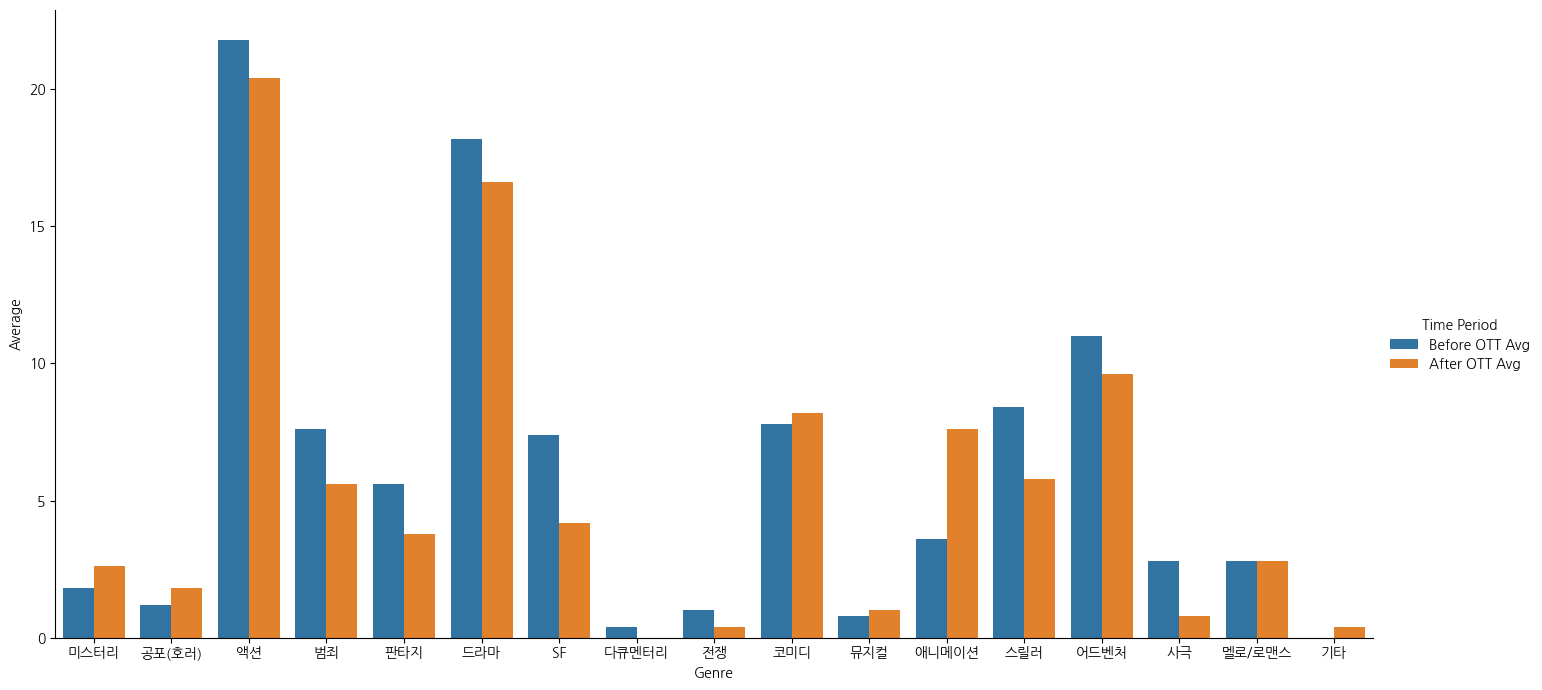

In [19]:
sns.catplot(x="Genre", y="Average", hue="Time Period", data=df_melted, kind="bar", legend=True, height=7, aspect=2)
plt.savefig('bef_aft_each_comparison_bar.png')
plt.show()